In [34]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
loans_df = pd.read_csv('Resources/lending_data.csv')

# Review the DataFrame

loans_df.sample(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
32079,8700.0,6.830,44900,0.331849,3,0,14900,0
11539,9300.0,7.096,47400,0.367089,3,0,17400,0
15630,8600.0,6.791,44500,0.325843,3,0,14500,0
45429,11000.0,7.813,54100,0.445471,5,1,24100,0
34613,9200.0,7.052,47000,0.361702,3,0,17000,0
14474,9700.0,7.254,48900,0.386503,4,0,18900,0
3932,9900.0,7.316,49400,0.392713,4,0,19400,0
63450,7300.0,6.228,39200,0.234694,2,0,9200,0
44153,9600.0,7.210,48400,0.380165,4,0,18400,0
52674,10600.0,7.633,52400,0.427481,5,1,22400,0


In [25]:
loans_df.describe()

# note only 3% of loan applicants were at risk in this set

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [18]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = loans_df['loan_status']

# Separate the X variable, the features
X = loans_df.drop(columns=['loan_status'])


In [19]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [20]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [21]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [22]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
logistic_regression_model = LogisticRegression(solver='lbfgs', random_state=1)


# Fit the model using training data
lr_model = logistic_regression_model.fit(X_train, y_train)


### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [26]:
# Make a prediction using the testing data
predictions = logistic_regression_model.predict(X_test)


### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

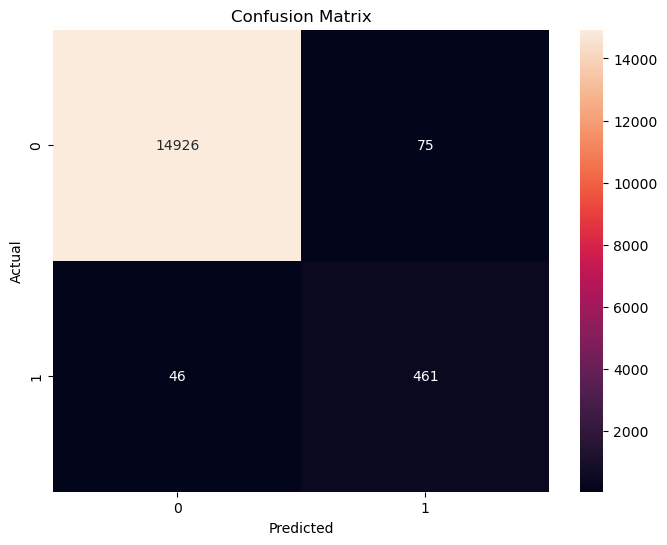

In [38]:
# Generate a confusion matrix for the model
confusion = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [40]:
# Print the classification report for the model
classification = classification_report(y_test, predictions, digits=4)

print(classification)

              precision    recall  f1-score   support

           0     0.9969    0.9950    0.9960     15001
           1     0.8601    0.9093    0.8840       507

    accuracy                         0.9922     15508
   macro avg     0.9285    0.9521    0.9400     15508
weighted avg     0.9925    0.9922    0.9923     15508



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model retrieves more than 99% of healthy loans and about 91% of the risky loans. 9% of the at-risk loans it accordingly failed to detect. As the accurate detection of high-risk loans would be significantly more important in an underwriting context, and given that the latter make up a much larger part of the data, the general accuracy results and averages oversell the predictive utility of the model for its likely use case. A model tuned to this use case would permit lower precision for detecting risky loans in favor of improving this 91% recall rate.

---